In [1]:
import numpy as np
import torch
from torch import optim, nn
from matplotlib import pyplot as plt
from trial import run_trial
from losses import get_negative_loss
from models import MultilayerPerceptron
from datasets import BinaryDataset, ToTensor
from display_results import loss_over_time, model_output_over_time

In [2]:
g_model = MultilayerPerceptron
g_model_kwargs = {'n_inputs': 1,
                  'n_outputs': 1}
d_model = MultilayerPerceptron
d_model_kwargs = {'n_inputs': 1,
                  'n_outputs': 1}
d_loss_fn = nn.MSELoss
d_loss_fn_kwargs = {}
g_loss_fn = get_negative_loss(d_loss_fn)
g_loss_fn_kwargs = {}
d_optimizer = optim.Adam
d_optimizer_kwargs = {}
g_optimizer = optim.Adam
g_optimizer_kwargs = {}
device = 'cpu'
trial_kwargs = {'d_pretrain_epochs': 0,
                'g_pretrain_epochs': 0,
                'gan_train_epochs': 10000,
                'd_posttrain_epochs': 0,
                'g_posttrain_epochs': 0}
train_dataset = BinaryDataset(x_transform=ToTensor(), y_transform=ToTensor())
val_dataset = None
train_dataloader_kwargs = {}
val_dataloader_kwargs = {}

run_trial_args = [g_model, d_model, g_model_kwargs, d_model_kwargs,
                    g_loss_fn, d_loss_fn, g_loss_fn_kwargs, d_loss_fn_kwargs,
                    g_optimizer, d_optimizer, g_optimizer_kwargs, d_optimizer_kwargs,
                    train_dataset, train_dataloader_kwargs, val_dataset, val_dataloader_kwargs,
                    device, trial_kwargs]
num_seeds = 5

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 543.80it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 547.43it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 516.73it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

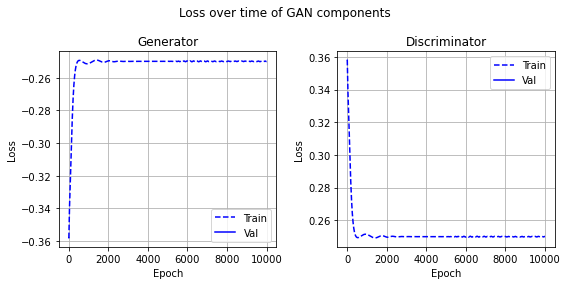

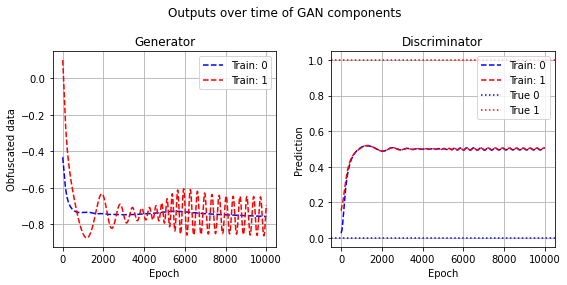

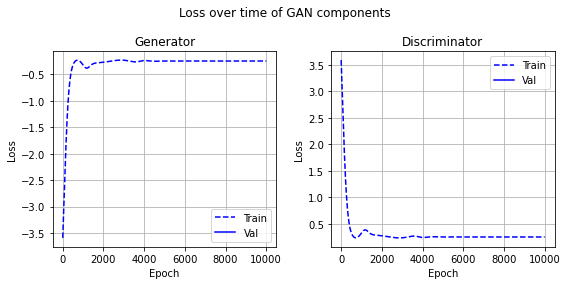

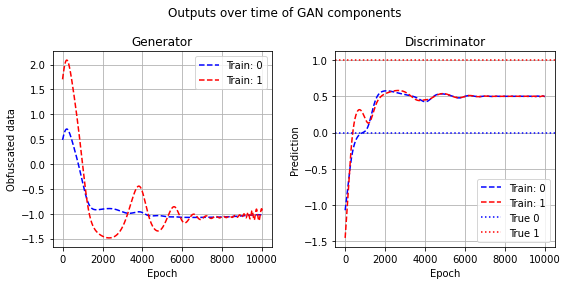

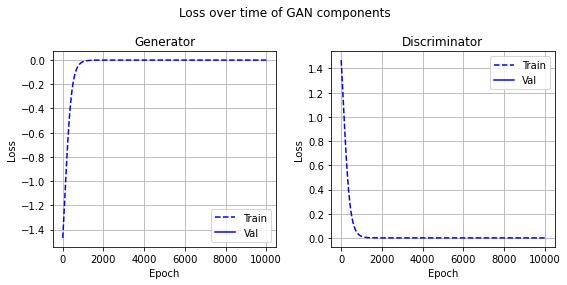

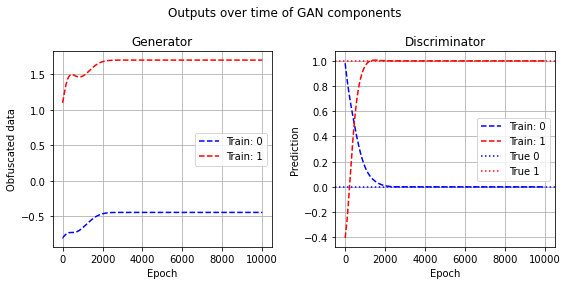

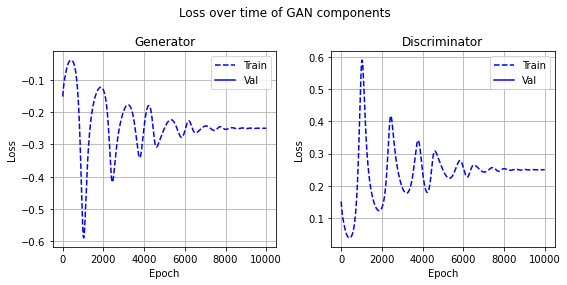

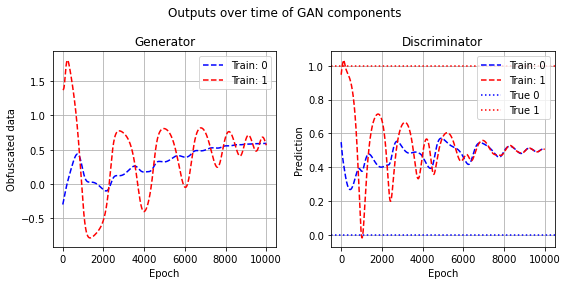

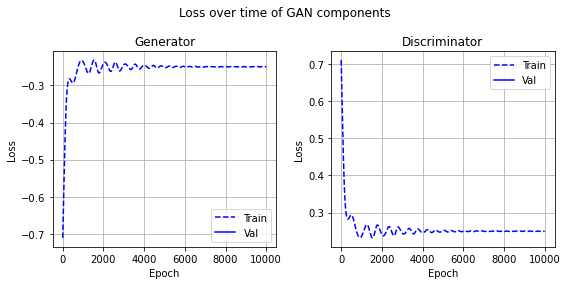

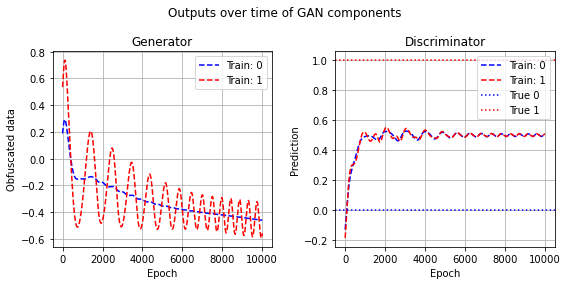

In [3]:
for _ in range(num_seeds):
    results = run_trial(*run_trial_args)
    g_losses_train, d_losses_train, obfuscated_signals_train, predictions_train, g_losses_val, d_losses_val, obfuscated_signals_val, predictions_val = results
    _ = loss_over_time(g_losses_train, g_losses_val, d_losses_train, d_losses_val)
    _ = model_output_over_time(obfuscated_signals_train, obfuscated_signals_val, predictions_train, predictions_val)